## Визуализация данных. Итоговое задание

In [35]:
# активизируем библиотеки Pandas и библиотеки визуализации Matplotlib, Seaborn & Plotly
import pandas as pd                     
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px


In [36]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [37]:
churn_df = churn_data.copy()                        # создаем копию DataFrame
churn_df = churn_df.drop(['RowNumber'], axis=1)     # удаляем неинформативный стоблец
churn_df.info()
churn_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


(10000, 13)

### 9.1. Каково соотношение ушедших и лояльных клиентов?

In [38]:
# создаем признак Status для расшифровки колонки Exited
def status(code):
    if code == 1:
        return 'left'
    elif code == 0:
        return 'loyal'
churn_df['Status'] = churn_df['Exited'].apply(status)

Text(0.5, 1.0, 'Share of loyal customers / Доля лояльных клиентов')

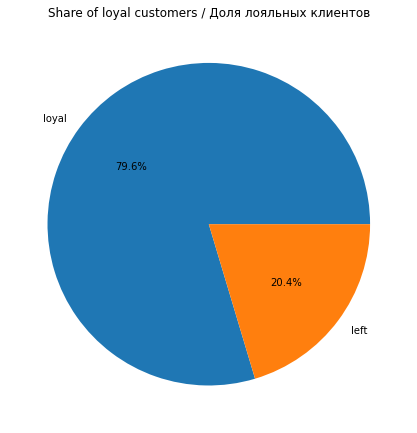

In [39]:
loyal_share = churn_df['Status'].value_counts(normalize=True)     #Pie Matplotlib
fig = plt.figure(figsize = (7, 7), facecolor='white')
axes = fig.add_axes([0.2, 0.2, 0.8, 0.8])
axes.pie(loyal_share, labels=loyal_share.index, autopct='%.1f%%')
axes.set_title('Share of loyal customers / Доля лояльных клиентов')

##### Мы видим, что большая часть клиентов, а именно 79.6%, являются лояльными клиентами. Однако доля ушедших клиентов составляет 20.4%, что представляет слишком высокую долю оттока.

### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов.

<AxesSubplot:title={'center':'Распределение клиентов в соответствии с их балансом'}, ylabel='Frequency'>

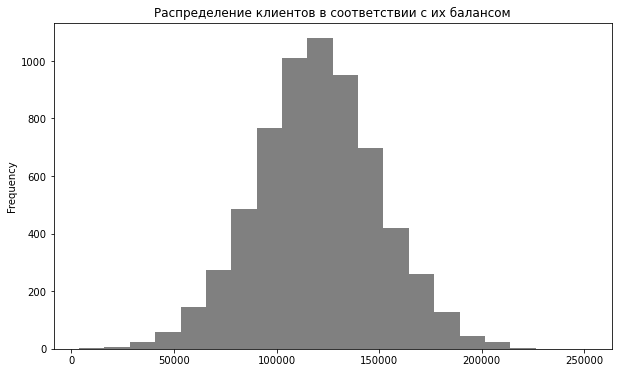

In [40]:
churn_balance = churn_df[churn_df['Balance'] > 2500]['Balance']  #гистограма Pandas
churn_balance.plot(
    kind='hist', 
    figsize=(10, 6), 
    color='grey', 
    bins=20, grid = False,  
    title='Распределение клиентов в соответствии с их балансом')

##### Распределение баланса пользователей, баланс которых превышает 2500 долларов, представляет собой нормальное распределение с математическим ожиданием примерно на 120 тысяч долларов 

### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

Text(0.5, 1.0, 'Баланс ушедших клиентов')

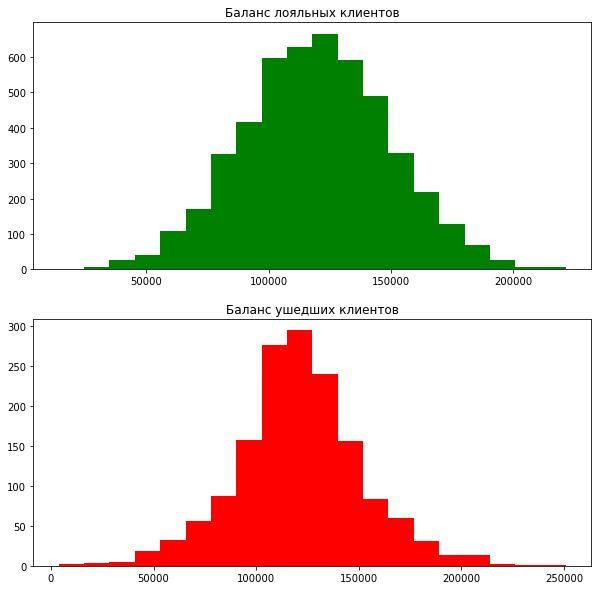

In [41]:
churn_balance = churn_df[churn_df['Balance'] > 2500]
balance_loyal = churn_balance[churn_balance['Status'] == 'loyal']['Balance']  
balance_left = churn_balance[churn_balance['Status'] == 'left']['Balance']
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))                                #Matplotlib subplots
axes[0].hist(x=balance_loyal, label=['Баланс лояльных клиентов'], color='green', bins=20)
axes[0].set_title("Баланс лояльных клиентов")
axes[1].hist(x=balance_left, label=['Баланс ушедших клиентов'], color='red', bins=20)
axes[1].set_title("Баланс ушедших клиентов")

##### Распределение как лояльных клиентов, так и ушедших клиентов носит нормальный характер. Математическое ожидание и для одной и для другой группы около 120 тысяч долларов.

Text(0.5, 1.0, 'Возраст ушедших клиентов')

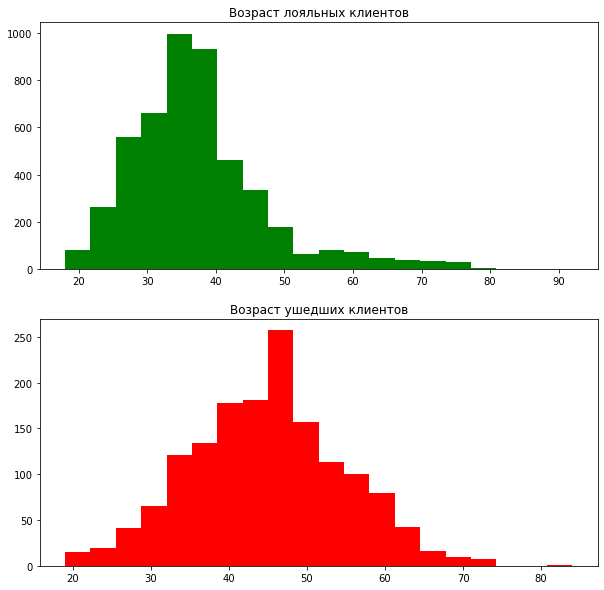

In [42]:
churn_balance = churn_df[churn_df['Balance'] > 2500]
age_loyal = churn_balance[churn_balance['Status'] == 'loyal']['Age']  
age_left = churn_balance[churn_balance['Status'] == 'left']['Age']
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))                    #Matplotlib subplots
axes[0].hist(x=age_loyal, color='green', bins=20)
axes[0].set_title("Возраст лояльных клиентов")
axes[1].hist(x=age_left, color='red', bins=20)
axes[1].set_title("Возраст ушедших клиентов")

##### Проанализировав различные параметры, удалось выяснить, что средний возраст ушедших клиентов примерно на 12 лет выше, чем лояльных клиетнов (примерно 48 лет против 36 лет)

Text(0.5, 1.0, 'Количество продуктов у ушедших клиентов')

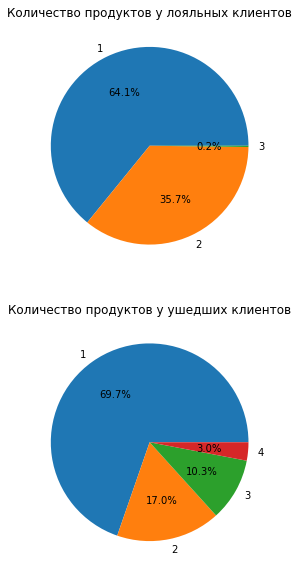

In [43]:
churn_balance = churn_df[churn_df['Balance'] > 2500]
products_loyal = churn_balance[churn_balance['Status'] == 'loyal']['NumOfProducts'].value_counts()
products_left = churn_balance[churn_balance['Status'] == 'left']['NumOfProducts'].value_counts()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), facecolor='white')                        #Matplotlib subplots
axes[0].pie(products_loyal, labels=products_loyal.index, autopct='%.1f%%')
axes[1].pie(products_left, labels=products_left.index, autopct='%.1f%%')
axes[0].set_title("Количество продуктов у лояльных клиентов")
axes[1].set_title("Количество продуктов у ушедших клиентов")


##### Также мы видим, что у части ушедших клиентов было по 3 и 4 продукта (13% ушедших клиентов), тогда как лояльные клиент пользуются 1 или 2 продуктами. Возможно это тоже могло повлиять на удовлетворенность клиентов.

Text(0.5, 1.0, 'География ушедших клиентов')

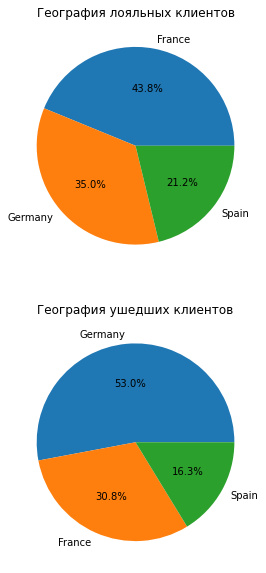

In [44]:
churn_balance = churn_df[churn_df['Balance'] > 2500]
geography_loyal = churn_balance[churn_balance['Status'] == 'loyal']['Geography'].value_counts()
geography_left = churn_balance[churn_balance['Status'] == 'left']['Geography'].value_counts()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10), facecolor='white')                        #Matplotlib subplots
axes[0].pie(geography_loyal, labels=geography_loyal.index, autopct='%.1f%%')
axes[1].pie(geography_left, labels=geography_left.index, autopct='%.1f%%')
axes[0].set_title("География лояльных клиентов")
axes[1].set_title("География ушедших клиентов")

##### Также, если мы взглянем на географию ушедших клиентов, то среди них на 10% больше клиентов из Германии, чем среди лояльных клиентов.

### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

Text(0.5, 1.0, 'Распределение ушедших клиентов по возрасту и странам')

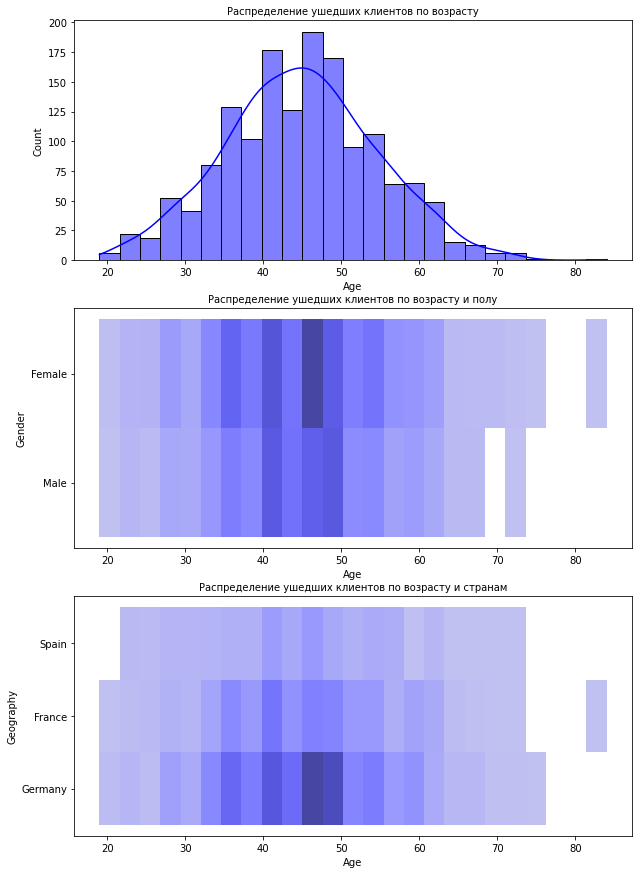

In [45]:
churn_balance = churn_df[churn_df['Balance'] > 2500]
age_left = churn_balance[churn_balance['Status'] == 'left']['Age']
geography_left = churn_balance[churn_balance['Status'] == 'left']['Geography']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))                                        #Seaborn
sns.histplot(data=churn_balance, x = age_left, bins=25, color='blue', kde=True,  ax=axes[0])
sns.histplot(data=churn_balance, x =age_left, y='Gender', bins=25, color='blue', ax=axes[1])
sns.histplot(data=churn_balance, x =age_left, y='Geography', bins=25, color='blue', ax=axes[2])

axes[0].set_title('Распределение ушедших клиентов по возрасту', fontsize=10)
axes[1].set_title('Распределение ушедших клиентов по возрасту и полу', fontsize=10)
axes[2].set_title('Распределение ушедших клиентов по возрасту и странам', fontsize=10)


##### Проанализировав графики ушедших клиентов в разрезе возраста, гендера и географии, мы увидели, что выбросы были характерны для возраста старше 80 лет у женщин из Франции, а также для мужчин старше 70 лет. 
##### Больше всего ушедших клиентов было в возресте 47-48 лет, в большинстве своем это были женщины из Германии. Стоит обратить внимание на те услуги, которые банк предлагает в Германии, и на удовлетворенность данной возрастной категории клиентов, особенно женщин.

### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

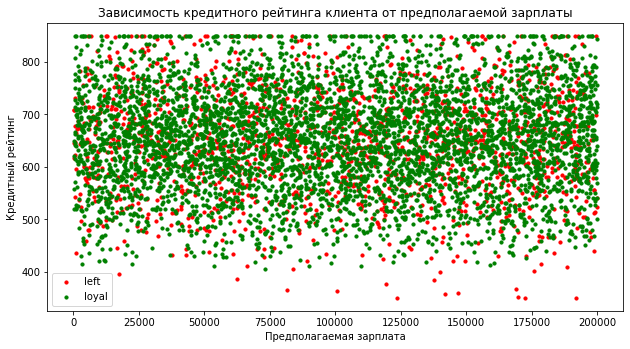

In [46]:
salary_left = churn_balance[churn_balance['Status'] == 'left']['EstimatedSalary']
score_left = churn_balance[churn_balance['Status'] == 'left']['CreditScore']
salary_loyal = churn_balance[churn_balance['Status'] == 'loyal']['EstimatedSalary']
score_loyal = churn_balance[churn_balance['Status'] == 'loyal']['CreditScore']

fig=plt.figure(figsize=(8, 4))                                                  #Matplotlib
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = salary_left, y = score_left, s = 10, marker = 'o', c='red')
axes.scatter(x = salary_loyal, y = score_loyal, s = 10, marker = 'o', c='green')
axes.set_xlabel('Предполагаемая зарплата')
axes.set_ylabel('Кредитный рейтинг')
axes.set_title('Зависимость кредитного рейтинга клиента от предполагаемой зарплаты')
axes.legend(['left', 'loyal']) 

##### Мы построили scatter plot зависимости кредитного рейтинга (ось ординат) от предполагаемой зарплаты клиентов (ось абсцисс). Зеленым цветом на графике показаны лояльные клиенты, красным - ушедшие. На графике мы не видим явной взаимосвязи между этими признаками.

### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

Text(0.5, 1.0, 'Соотношение мужчин и женщин среди ушедших клиентов')

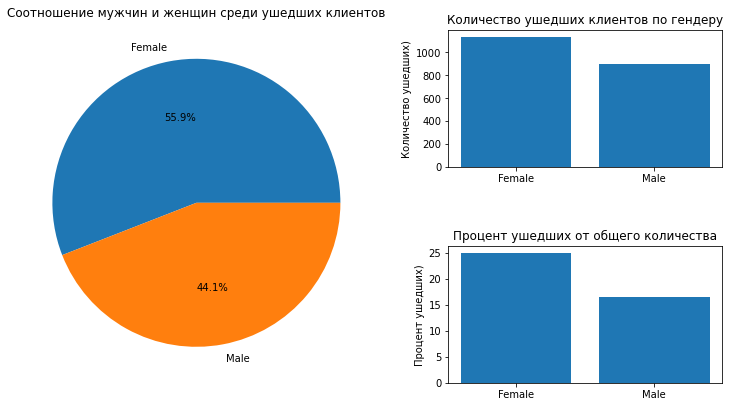

In [47]:
gender_left = churn_df[churn_df['Status'] == 'left']['Gender'].value_counts()
gender_left_norm = churn_df[churn_df['Status'] == 'left']['Gender'].value_counts(normalize=True)
gender_total = churn_df['Gender'].value_counts()
left_share = gender_left/gender_total*100

fig = plt.figure(figsize=(10, 5))
pie_axes = fig.add_axes([0, 0, 0.5, 1])
abs_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
percent_axes = fig.add_axes([0.6, 0, 0.38, 0.38])

abs_axes.bar(x = gender_left.index, height = gender_left)
percent_axes.bar(x=left_share.index, height = left_share)
abs_axes.set_ylabel('Количество ушедших)')
abs_axes.set_title('Количество ушедших клиентов по гендеру')
percent_axes.set_ylabel('Процент ушедших)')
percent_axes.set_title('Процент ушедших от общего количества')

pie_axes.pie(gender_left_norm, labels=gender_left_norm.index, autopct='%.1f%%')
pie_axes.set_title('Соотношение мужчин и женщин среди ушедших клиентов')


##### Если мы посмотрим на график соотношения мужчин и женщин среди ушедших клиентов, мы видим, что среди ушедших было 55.9% против 44.1% мужчин. В абсолютной величине мы видим распределение ушедших клиентов по гендеру на верхнем правом графике. Однако этих двух графиков недостаточно, чтобы утверждать, что женщины уходят чаще. Давайте взглянем на график процента ушедших от общего количества клиентов. На нем мы видим, что доля ушедших клиентов-женщин была около 25% от общего количества клиентов-женщин, в то время как доля ушедших клиентов-мужчин от общего количества клиентов-муждит составляла около 16%. Теперь мы можем однозначно утверждать, что женщины уходят чаще.

### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

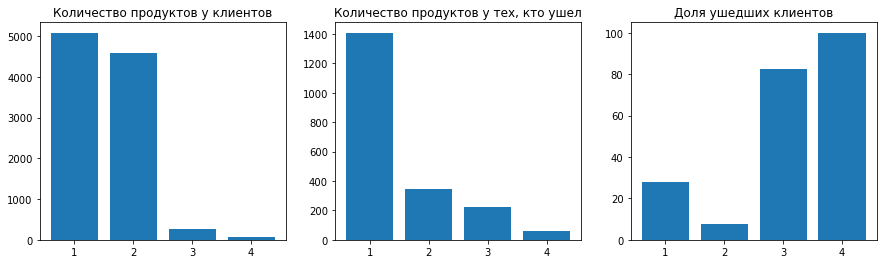

In [48]:
products_left = churn_df[churn_df['Status'] == 'left']['NumOfProducts'].value_counts()
products_total = churn_df['NumOfProducts'].value_counts()
products_left_share = products_left / products_total * 100

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))                         #Matplotlib subplots

axes[0].bar(x=products_total.index, height=products_total)
axes[0].set_title('Количество продуктов у клиентов')
axes[0].xaxis.set_tick_params(rotation=0)

axes[1].bar(x=products_left.index, height = products_left, label='Ушли')
axes[1].set_title('Количество продуктов у тех, кто ушел')
axes[1].xaxis.set_tick_params(rotation=0)

axes[2].bar(x=products_left.index, height = products_left_share, label='Доля ушедших клиентов')
axes[2].set_title('Доля ушедших клиентов')
axes[2].xaxis.set_tick_params(rotation=0)


##### На представленных диаграммах мы видим 1) общее количество клиентов в разбивке по количеству продуктов, 2) количество ушедших клиентов в разбивке по количеству продуктов и 3) доля ушедших клиентов в разбивке по количеству продуктов. Мы видим, что наименьшая доля ушедших 7.5% была среди тех клиентов, у кого было 2 продукта. У тех, у кого было 3 продукта, доля ушедших составила 82.7%, и из тех, у кого было 4 продукта, ушли 100%. Стоит обратить на это внимание и не перегружать клиентов разнообразными продуктами, а лучше обратить внимание на качество обслуживания уже по имеющимся продуктам.

### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

Text(0.5, 1.0, 'Доля активных среди ушедших клиентов')

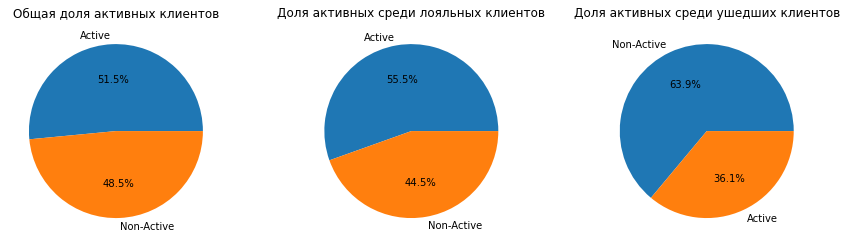

In [49]:
churn_df['Active'] = churn_df['IsActiveMember'].apply(lambda x: 'Active' if x == 1 else 'Non-Active')
active_left = churn_df[churn_df['Status'] == 'left']['Active'].value_counts()
active_loyal = churn_df[churn_df['Status'] == 'loyal']['Active'].value_counts()
active_total = churn_df['Active'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), facecolor='white')                         #Matplotlib subplots
axes[0].pie(x=active_total, labels=active_total.index, autopct='%.1f%%')
axes[0].set_title('Общая доля активных клиентов')
axes[1].pie(x=active_loyal, labels=active_loyal.index, autopct='%.1f%%')
axes[1].set_title('Доля активных среди лояльных клиентов')
axes[2].pie(x=active_left, labels=active_left.index, autopct='%.1f%%')
axes[2].set_title('Доля активных среди ушедших клиентов')


##### Если мы посмотрим на распределение всех клиентов, то увидим, что статус активного клиента имеют 51.5%. Среди лояльных клиентов доля активных клиентов еще выше и составляет 55.5%. Среди же ушедших клиентов доля активных клиентов составляла 36.1%. То есть, чем активнее клиент, тем ниже вероятность, что он уйдет.
##### (Я, к сожалению, не нашла, каким образом раскрасить ативных клиентов в один цвет на всех графиках. В данном случае цвет выбирается в зависимости от доли)

Text(0.5, 1.0, 'Кредитный рейтинг и возраст')

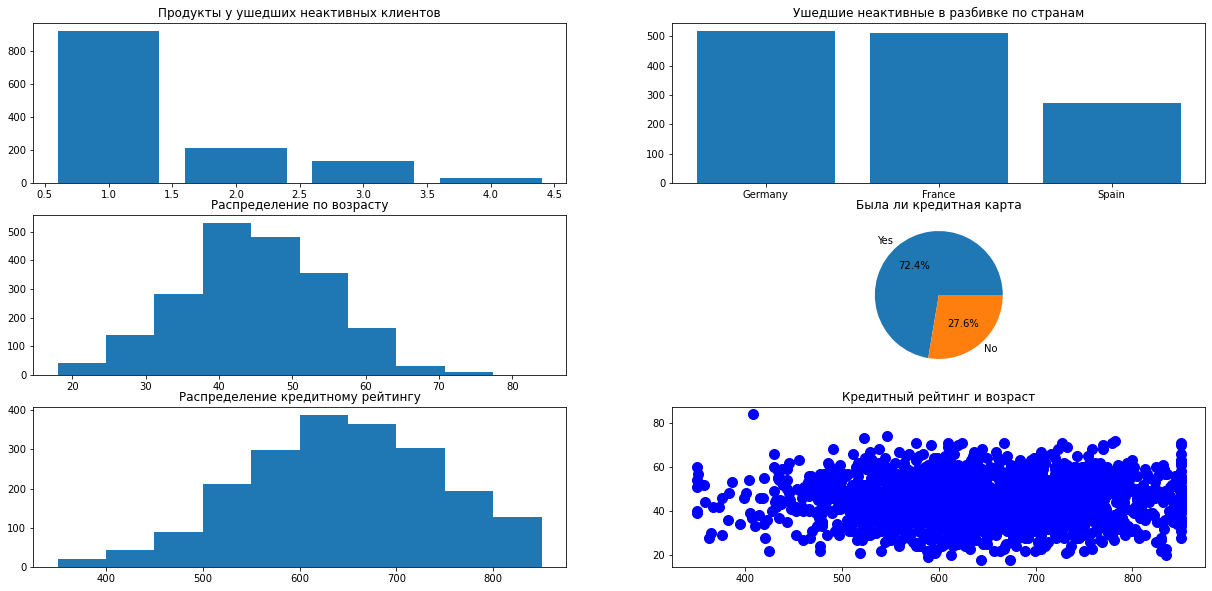

In [50]:
churn_df['CreditCard'] = churn_df['HasCrCard'].apply(lambda x: 'Yes' if x == 1 else 'No')
churn_left = churn_df[churn_df['Status'] == 'left']
products_left = churn_left[churn_left['Active']== 'Non-Active']['NumOfProducts'].value_counts()
geography_left = churn_left[churn_left['Active']== 'Non-Active']['Geography'].value_counts()
creditcard_left = churn_left[churn_left['Active']== 'Non-Active']['CreditCard'].value_counts()

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(21, 10))
axes[0, 0].bar(x=products_left.index, height=products_left)
axes[0, 0].set_title('Продукты у ушедших неактивных клиентов')

axes[0, 1].bar(x=geography_left.index, height=geography_left)
axes[0, 1].set_title('Ушедшие неактивные в разбивке по странам')

axes[1, 0].hist(x=churn_left['Age'], bins=10)
axes[1, 0].set_title('Распределение по возрасту')

axes[1, 1].pie(x=creditcard_left, labels=creditcard_left.index, autopct='%.1f%%')
axes[1, 1].set_title('Была ли кредитная карта')

axes[2, 0].hist(x=churn_left['CreditScore'], bins=10)
axes[2, 0].set_title('Распределение кредитному рейтингу')

axes[2, 1].scatter(x=churn_left['CreditScore'], y=churn_left['Age'], s=100, marker='o', c='blue')
axes[2, 1].set_title('Кредитный рейтинг и возраст')

#### Мы подготовили несколько аналитических графиков касательно ушедших клиентов, бывших в неактивном статусе. Пока не видно явной тенденции. Нужно подтоговить сравнительный анализ ушедших и лояльных клиентов.

Text(0.5, 1.0, 'Лояльные - страны')

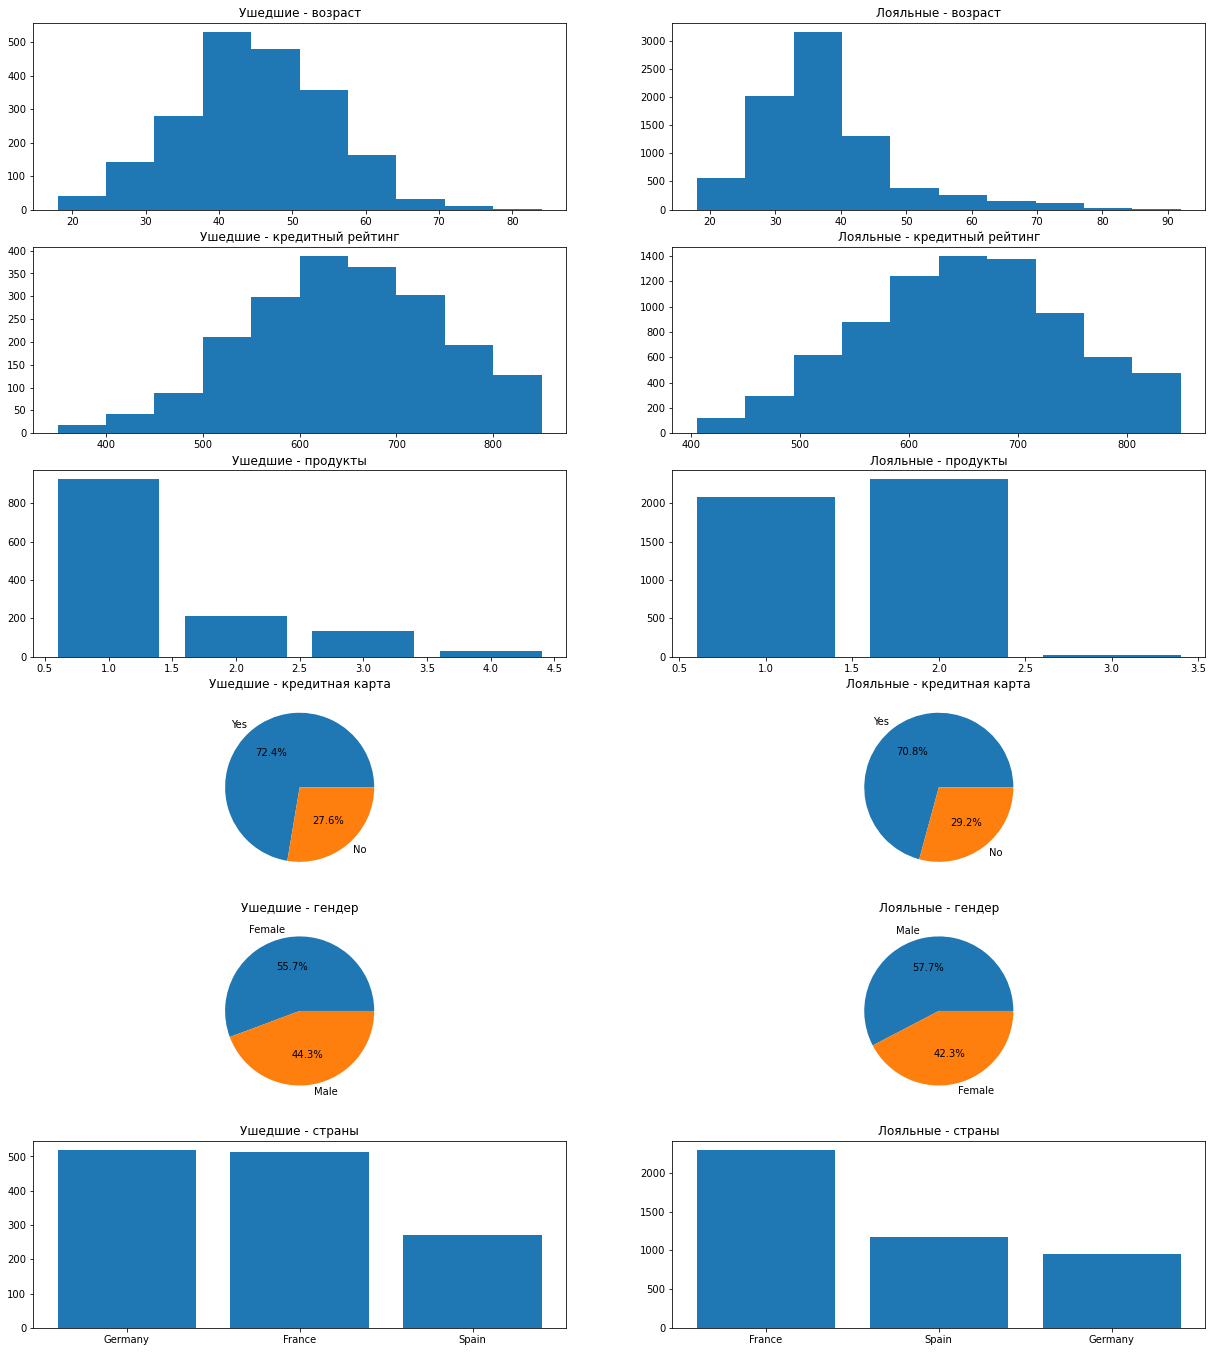

In [51]:
churn_loyal = churn_df[churn_df['Status'] == 'loyal']
products_loyal = churn_loyal[churn_loyal['Active']== 'Active']['NumOfProducts'].value_counts()
geography_loyal = churn_loyal[churn_loyal['Active']== 'Active']['Geography'].value_counts()
creditcard_loyal = churn_loyal[churn_loyal['Active']== 'Active']['CreditCard'].value_counts()
gender_loyal = churn_loyal[churn_loyal['Active']== 'Active']['Gender'].value_counts()
gender_left = churn_left[churn_left['Active']== 'Non-Active']['Gender'].value_counts()

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(21, 24))

axes[0, 0].hist(x=churn_left['Age'], bins=10)
axes[0, 0].set_title('Ушедшие - возраст')
axes[0, 1].hist(x=churn_loyal['Age'], bins=10)
axes[0, 1].set_title('Лояльные - возраст')

axes[1, 0].hist(x=churn_left['CreditScore'], bins=10)
axes[1, 0].set_title('Ушедшие - кредитный рейтинг')
axes[1, 1].hist(x=churn_loyal['CreditScore'], bins=10)
axes[1, 1].set_title('Лояльные - кредитный рейтинг')

axes[2, 0].bar(x=products_left.index, height=products_left)
axes[2, 0].set_title('Ушедшие - продукты')
axes[2, 1].bar(x=products_loyal.index, height=products_loyal)
axes[2, 1].set_title('Лояльные - продукты')

axes[3, 0].pie(x=creditcard_left, labels=creditcard_left.index, autopct='%.1f%%')
axes[3, 0].set_title('Ушедшие - кредитная карта')
axes[3, 1].pie(x=creditcard_loyal, labels=creditcard_loyal.index, autopct='%.1f%%')
axes[3, 1].set_title('Лояльные - кредитная карта')

axes[4, 0].pie(x=gender_left, labels=gender_left.index, autopct='%.1f%%')
axes[4, 0].set_title('Ушедшие - гендер')
axes[4, 1].pie(x=gender_loyal, labels=gender_loyal.index, autopct='%.1f%%')
axes[4, 1].set_title('Лояльные - гендер')

axes[5, 0].bar(x=geography_left.index, height=geography_left)
axes[5, 0].set_title('Ушедшие - страны')
axes[5, 1].bar(x=geography_loyal.index, height=geography_loyal)
axes[5, 1].set_title('Лояльные - страны')

##### Из данного сравнительного анализа мы видим, что по многим показателям нет больших отличиев между группой лояльных и ушедших клиентов. Однако, мы видим, что по следующим параметрам есть отличия: среди ушедших клиентов большинство составляют женщины, возраст 40-45, тогда как лояльные клиенты - это в основном мужчины 35-40 лет. Ушедшие клиенты проживают в основном в Германии (также и во Франции, но в этой стране также много и лояльных клиентов). Я бы рекомендовала исследовать потребности данной группы (женщины, 40-45, Германия) и подготовить более подходящее предложение для улучшения лояльности.

### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

Text(114.0, 0.5, 'Страна')

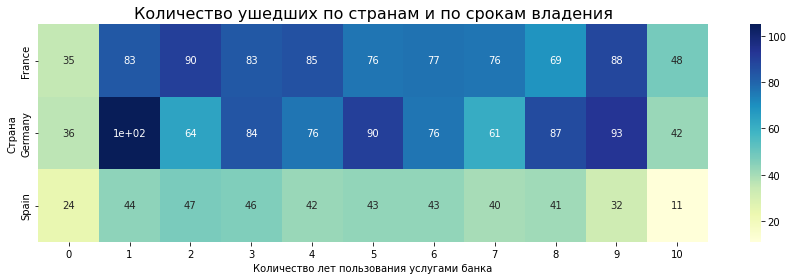

In [90]:
pivot_left = churn_df.pivot_table(values='Exited', index ='Geography', columns ='Tenure', aggfunc='sum') 
pivot = churn_df.pivot_table(values='Exited', index ='Geography', aggfunc='sum')
fig=plt.figure(figsize=(15, 4))
country_heatmap = sns.heatmap(data=pivot_left, cmap='YlGnBu', annot=True)               # Seaborn heatmap
country_heatmap.set_title('Количество ушедших по странам и по срокам владения', fontsize=16)
country_heatmap.set_xlabel('Количество лет пользования услугами банка')
country_heatmap.set_ylabel('Страна')

##### Самый большой отток наблюдается в Германии после одного года владения счетом. Также большой отток в Германии поле 5 и после 9 лет владения и во Франции после двух лет владения

### 9.10. Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
### На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


Text(113.09375, 0.5, 'Кредитный рейтинг')

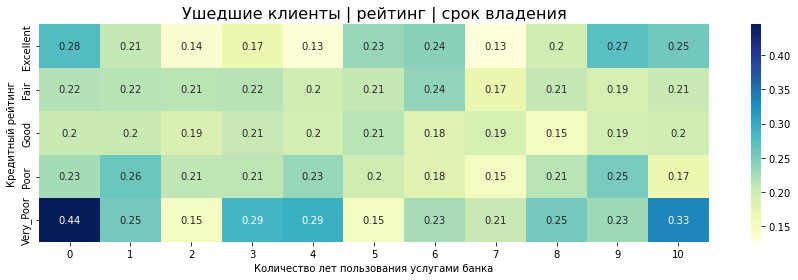

In [91]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_df['CreditScoreCat'] = churn_df['CreditScore'].apply(get_credit_score_cat) 
pivot = churn_df.pivot_table(values='Exited', index='CreditScoreCat', columns='Tenure')
fig=plt.figure(figsize=(15, 4))
creditscore_heatmap = sns.heatmap(data=pivot, cmap='YlGnBu', annot=True)               # Seaborn heatmap
creditscore_heatmap.set_title('Ушедшие клиенты | рейтинг | срок владения', fontsize=16)
creditscore_heatmap.set_xlabel('Количество лет пользования услугами банка')
creditscore_heatmap.set_ylabel('Кредитный рейтинг')

##### Данная тепловая карта показывает соотношение кредитного рейтинга клиета и срока пользования услугами банка. Как мы видим, самый высокий отток наблюдается среди клиентов с очень плохим рейтингом уже после одного года пользования услугами банка. Также для этой же группы высок риск оттока после 10 лет пользования услугами. Интересен тот факт, что для клиентов с отличным кредитным рейтингом высок отток после 1 года пользования услугами. Имеет смысл провести опрос и уточнить, в чем причина оттока клиентов из этой категории кредитного рейтинга. 

In [92]:
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Status,Active,CreditCard,credit_score,CreditScoreCat
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,left,Active,Yes,Fair,Fair
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,loyal,Active,No,Fair,Fair
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,left,Non-Active,Yes,Poor,Poor
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,loyal,Non-Active,No,Good,Good
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,loyal,Active,Yes,Excellent,Excellent
